In [2]:
import pandas as pd
df = pd.read_csv('credit card churn prediction.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [6]:
columns_to_drop = ['RowNumber', 'CustomerId', 'Surname']

# Drop only if they exist
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

# Show the result
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False


In [8]:
# Convert boolean (True/False) to integers (1/0) for all boolean-type columns
bool_cols = df.select_dtypes(include='bool').columns
df[bool_cols] = df[bool_cols].astype(int)

# Now check the changes
df.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [9]:
!pip install ydata-profiling

In [10]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [11]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\ARYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 9 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\ARYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 9 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\ARYA\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is 

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
df.duplicated().sum()

0

In [19]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [12]:
df['Gender_Male'].value_counts()

Gender_Male
1    5457
0    4543
Name: count, dtype: int64

In [13]:
print(df.isnull().values.any())

False


In [14]:
#Feature Engineering 
df['Customer_Longevity'] = df['Age'] * df['Tenure']
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Customer_Longevity
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,84
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,41
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,336
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,39
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,86
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1,195
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,350
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0,252
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,126


In [15]:
df['Balance_to_Salary'] = df['Balance'] / (df['EstimatedSalary'] + 1)  # +1 to avoid division by zero
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Customer_Longevity,Balance_to_Salary
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,84,0.000000
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,41,0.744670
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,336,1.401362
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,39,0.000000
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,86,1.587035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1,195,0.000000
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,350,0.564102
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0,252,0.000000
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,126,0.808222


In [16]:
df['IsInactiveRich'] = ((df['IsActiveMember'] == 0) & (df['Balance'] > 100000)).astype(int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Customer_Longevity,Balance_to_Salary,IsInactiveRich
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,84,0.000000,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,41,0.744670,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,336,1.401362,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,39,0.000000,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,86,1.587035,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1,195,0.000000,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,350,0.564102,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0,252,0.000000,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,126,0.808222,0


In [17]:
df['HasMultipleProducts'] = (df['NumOfProducts'] > 1).astype(int)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Customer_Longevity,Balance_to_Salary,IsInactiveRich,HasMultipleProducts
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,84,0.000000,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,41,0.744670,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,336,1.401362,1,1
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,39,0.000000,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,86,1.587035,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1,195,0.000000,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,350,0.564102,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0,252,0.000000,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,126,0.808222,0,1


In [74]:

# Create AgeGroup with labels (integers)
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 30, 45, 60, 100], labels=[1, 2, 3, 4])

# Check for missing values (if any Age values fall outside bins)
print(df['AgeGroup'].isnull().sum())

# If there are missing values, fill them with a default integer (e.g., 0 or the nearest group)
df['AgeGroup'] = df['AgeGroup'].cat.add_categories([0]).fillna(0)

# Convert to normal integer dtype (int64)
df['AgeGroup'] = df['AgeGroup'].astype('int64')


10000


In [75]:
from sklearn.preprocessing import StandardScaler

# Columns to scale
scale_cols = [
    'CreditScore', 
    'Tenure', 
    'Balance', 
    'NumOfProducts', 
    'EstimatedSalary', 
    'Customer_Longevity', 
    'Balance_to_Salary'
]

scaler = StandardScaler()

# Fit and transform only these columns
df[scale_cols] = scaler.fit_transform(df[scale_cols])

# Now df has scaled numeric continuous features
print(df.head())


   CreditScore       Age    Tenure  Balance  NumOfProducts  HasCrCard  \
0    -0.326221  0.293517 -1.041760      0.0      -0.911583          1   
1    -0.440036  0.198164 -1.387538      0.0      -0.911583          0   
2    -1.536794  0.293517  1.032908      0.0       2.527057          1   
3     0.501521  0.007457 -1.387538      0.0       0.807737          0   
4     2.063884  0.388871 -1.041760      0.0      -0.911583          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0               1              0.0       1                  0   
1               1              0.0       0                  0   
2               0              0.0       1                  0   
3               0              0.0       0                  0   
4               1              0.0       0                  0   

   Geography_Spain  Gender_Male  Customer_Longevity  Balance_to_Salary  \
0                0            0           -0.866106          -0.037881   
1                1    

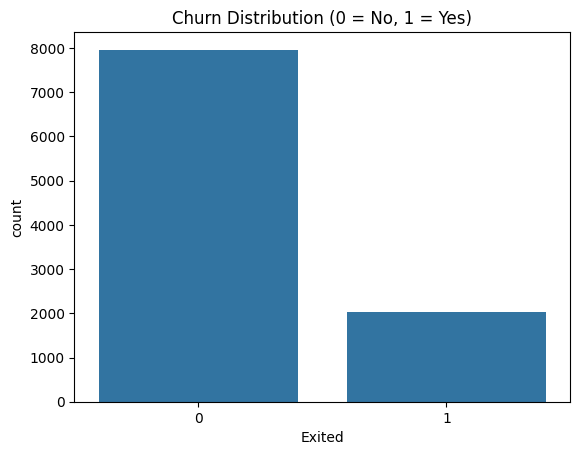

In [76]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Exited', data=df)
plt.title('Churn Distribution (0 = No, 1 = Yes)')
plt.show()


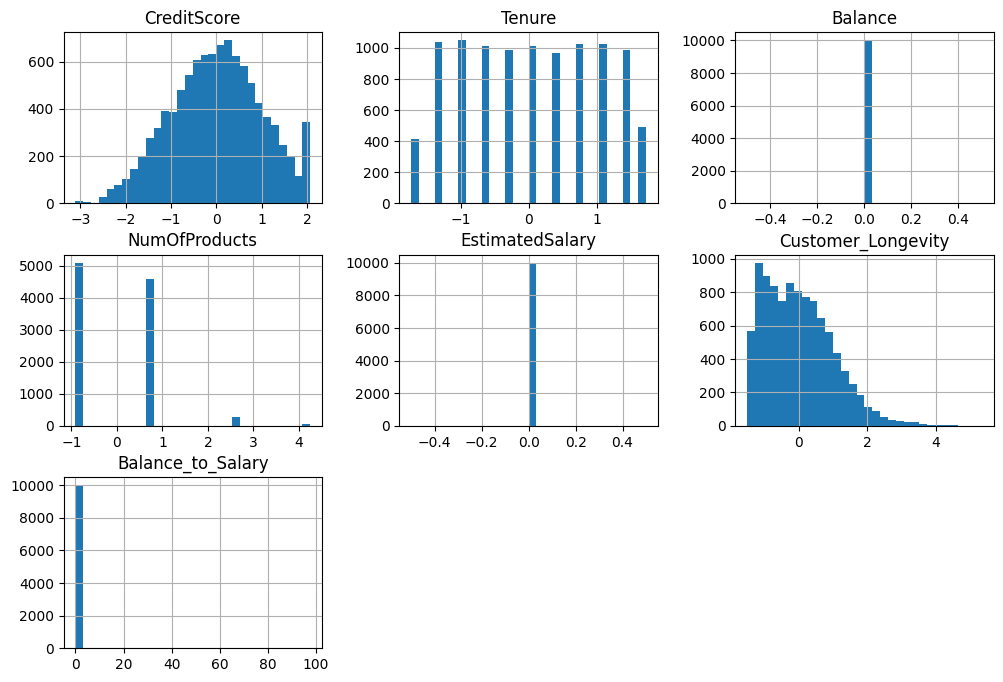

In [77]:
df[scale_cols].hist(bins=30, figsize=(12,8))
plt.show()


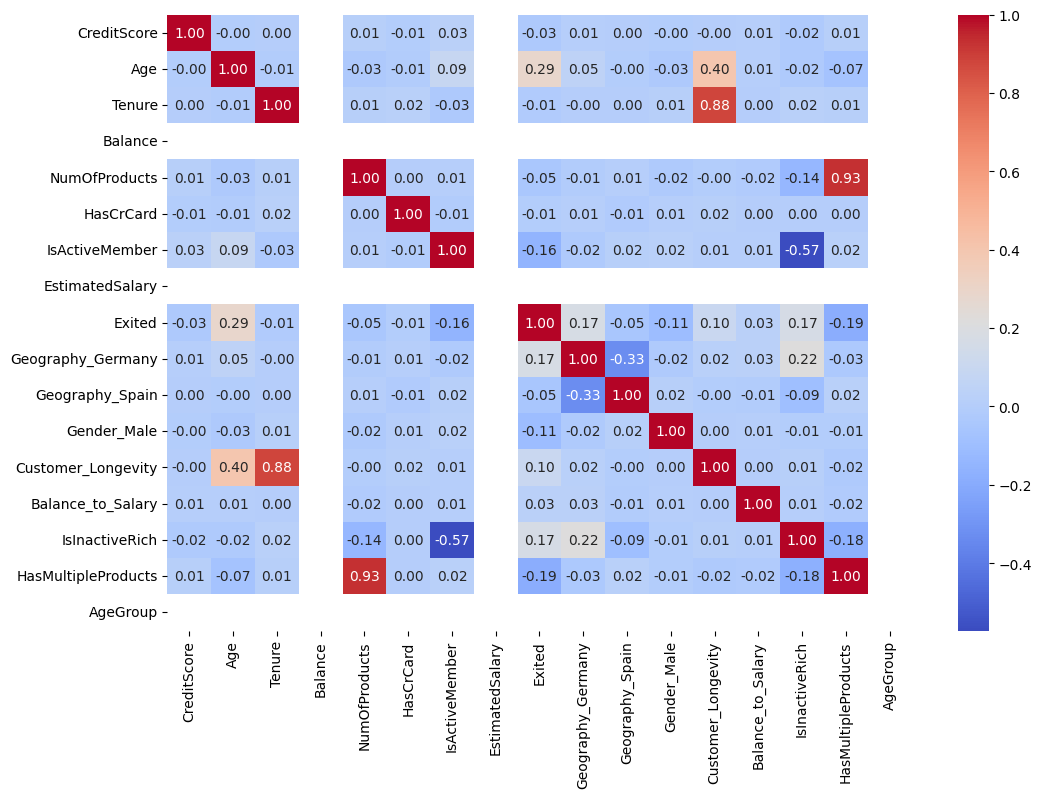

In [78]:

corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()




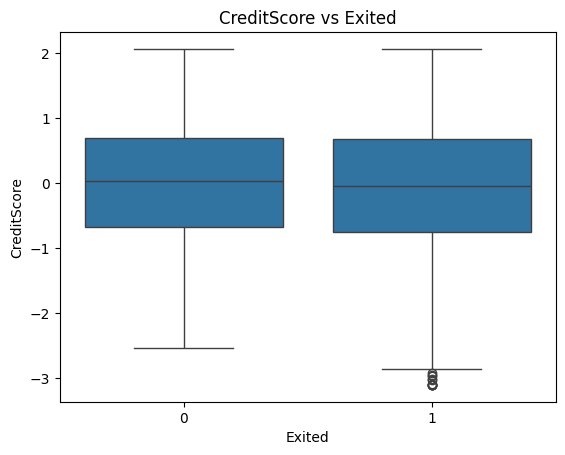

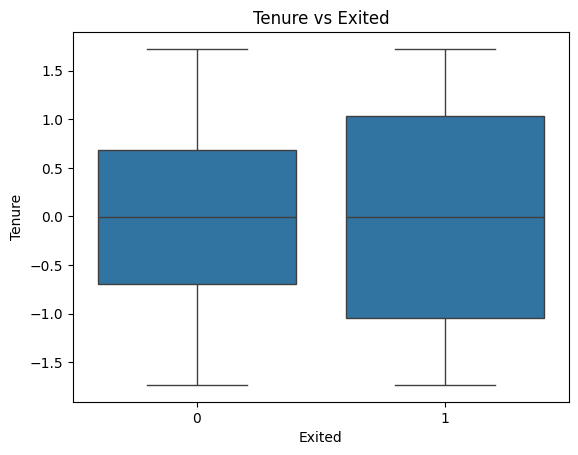

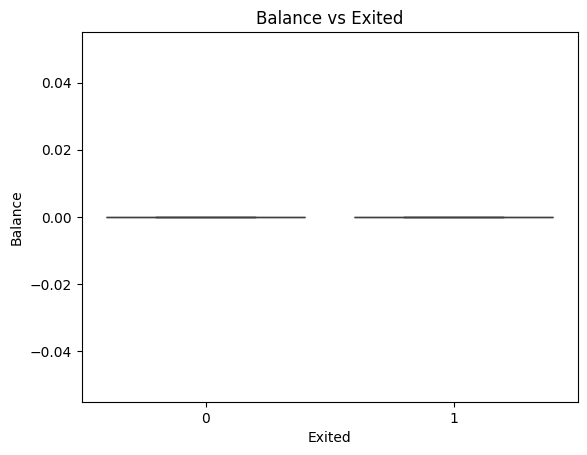

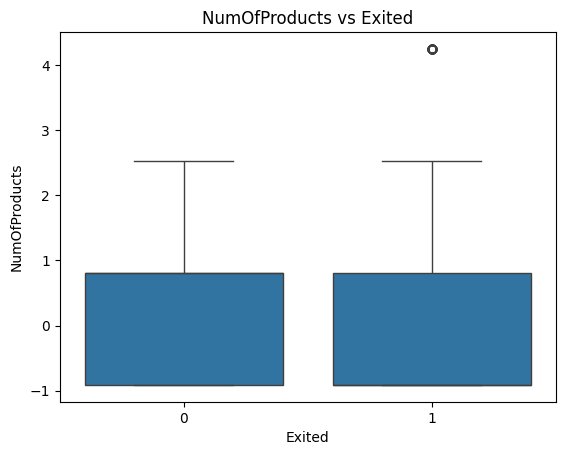

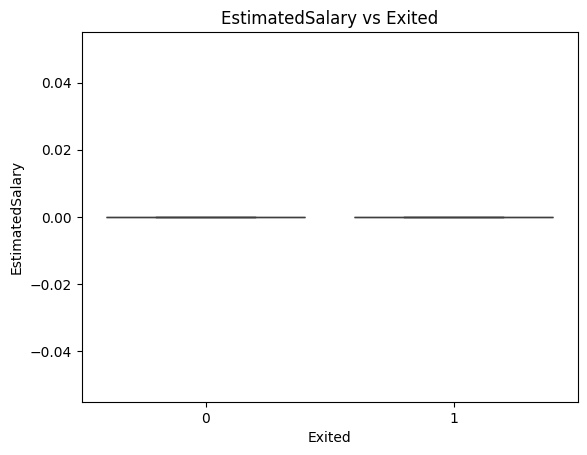

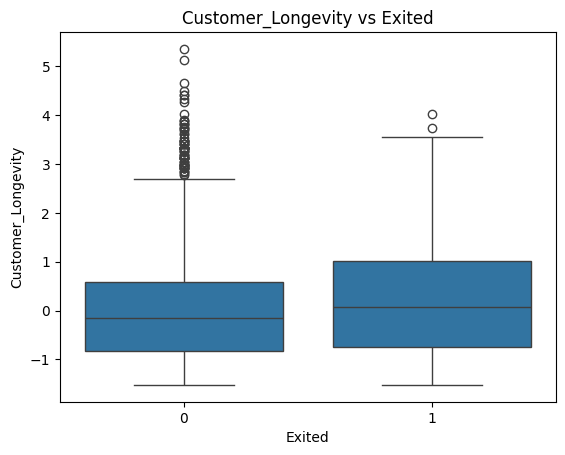

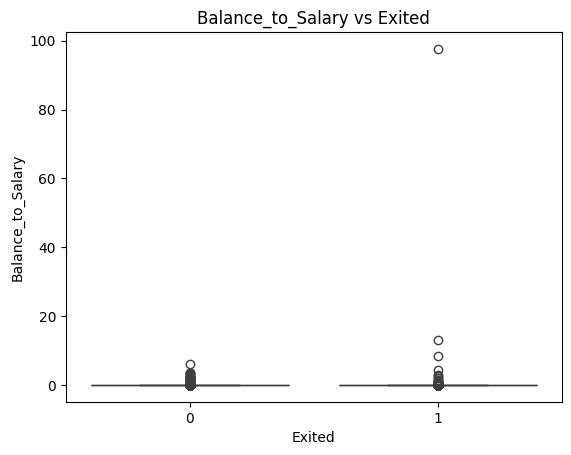

In [79]:
for col in scale_cols:
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f'{col} vs Exited')
    plt.show()


In [80]:
print(X_train.dtypes)



CreditScore            float64
Age                    float64
Tenure                 float64
Balance                float64
NumOfProducts          float64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Geography_Germany        int32
Geography_Spain          int32
Gender_Male              int32
Customer_Longevity     float64
Balance_to_Salary      float64
IsInactiveRich           int32
HasMultipleProducts      int32
AgeGroup                 Int64
dtype: object


In [81]:
print(X_train.isnull().sum())


CreditScore            0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Geography_Germany      0
Geography_Spain        0
Gender_Male            0
Customer_Longevity     0
Balance_to_Salary      0
IsInactiveRich         0
HasMultipleProducts    0
AgeGroup               0
dtype: int64


In [82]:
X = pd.get_dummies(X, drop_first=True)


In [83]:
print(X_train.isnull().sum())


CreditScore            0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Geography_Germany      0
Geography_Spain        0
Gender_Male            0
Customer_Longevity     0
Balance_to_Salary      0
IsInactiveRich         0
HasMultipleProducts    0
AgeGroup               0
dtype: int64


In [84]:
X_train = X_train.fillna(0)  # Or use mean/median imputation


In [85]:
X_train = X_train.fillna(X_train.median(numeric_only=True))
X_test = X_test.fillna(X_test.median(numeric_only=True))


In [86]:
print(X_train.dtypes)


CreditScore            float64
Age                    float64
Tenure                 float64
Balance                float64
NumOfProducts          float64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Geography_Germany        int32
Geography_Spain          int32
Gender_Male              int32
Customer_Longevity     float64
Balance_to_Salary      float64
IsInactiveRich           int32
HasMultipleProducts      int32
AgeGroup                 Int64
dtype: object


In [87]:
X_train['AgeGroup'] = X_train['AgeGroup'].fillna(0).astype('int64')
X_test['AgeGroup'] = X_test['AgeGroup'].fillna(0).astype('int64')


In [88]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)


In [89]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
import pandas as pd

# Ensure all features are numeric
X = df.drop('Exited', axis=1)
y = df['Exited']

# Optional: double check dtypes
#print(X.dtypes)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure no missing values
X_train = X_train.fillna(0)

# Apply SMOTE
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

# Check balance
print("Before Resampling:", Counter(y_train))
print("After Resampling:", Counter(y_train_resampled))


Before Resampling: Counter({0: 6370, 1: 1630})
After Resampling: Counter({1: 6370, 0: 6370})


In [90]:
for col in X_train.columns:
    if str(X_train[col].dtype).startswith('Int'):
        print(f"{col}: Nullable Int detected")
    elif X_train[col].dtype == 'float64':
        # check if it's actually safe to convert to int
        if (X_train[col] % 1 != 0).any():
            print(f"{col}: Has decimal values")


CreditScore: Has decimal values
Age: Has decimal values
Tenure: Has decimal values
NumOfProducts: Has decimal values
Customer_Longevity: Has decimal values
Balance_to_Salary: Has decimal values


In [91]:
X_train['AgeGroup'] = X_train['AgeGroup'].astype('float64')
X_test['AgeGroup'] = X_test['AgeGroup'].astype('float64')


In [92]:
# Import the required library fo,done logistic rergression what to do nextr SMOTE
from imblearn.over_sampling import SMOTE

# Define the features (X) and target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution after SMOTE
print(f"Before SMOTE - Train Set: {y_train.value_counts()}")
print(f"After SMOTE - Train Set: {y_train_resampled.value_counts()}")


Before SMOTE - Train Set: Exited
0    6356
1    1644
Name: count, dtype: int64
After SMOTE - Train Set: Exited
0    6356
1    6356
Name: count, dtype: int64


In [93]:
print(X_train.isnull().sum())


CreditScore            0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Geography_Germany      0
Geography_Spain        0
Gender_Male            0
Customer_Longevity     0
Balance_to_Salary      0
IsInactiveRich         0
HasMultipleProducts    0
AgeGroup               0
dtype: int64


In [94]:
# Fill numeric columns with median
X_train = X_train.fillna(X_train.median())

# Do the same for test set to maintain consistency
X_test = X_test.fillna(X_test.median())


In [95]:
X_train = X_train.dropna()
y_train = y_train[X_train.index]  # Keep target aligned


In [96]:
print(X_train.dtypes)


CreditScore            float64
Age                    float64
Tenure                 float64
Balance                float64
NumOfProducts          float64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Geography_Germany        int32
Geography_Spain          int32
Gender_Male              int32
Customer_Longevity     float64
Balance_to_Salary      float64
IsInactiveRich           int32
HasMultipleProducts      int32
AgeGroup                 int64
dtype: object


In [97]:
print(df.dtypes[df.dtypes == "Int64"])


Series([], dtype: object)


In [98]:
# Fill missing values with a suitable value, e.g., median or 0
df['AgeGroup'] = df['AgeGroup'].fillna(df['AgeGroup'].median())


In [99]:
df['AgeGroup'] = df['AgeGroup'].astype('int64')


In [100]:
print(X_train.dtypes)

CreditScore            float64
Age                    float64
Tenure                 float64
Balance                float64
NumOfProducts          float64
HasCrCard                int64
IsActiveMember           int64
EstimatedSalary        float64
Geography_Germany        int32
Geography_Spain          int32
Gender_Male              int32
Customer_Longevity     float64
Balance_to_Salary      float64
IsInactiveRich           int32
HasMultipleProducts      int32
AgeGroup                 int64
dtype: object


In [101]:
# Import the required library fo,done logistic rergression what to do nextr SMOTE
from imblearn.over_sampling import SMOTE

# Define the features (X) and target (y)
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the new distribution after SMOTE
print(f"Before SMOTE - Train Set: {y_train.value_counts()}")
print(f"After SMOTE - Train Set: {y_train_resampled.value_counts()}")


Before SMOTE - Train Set: Exited
0    6356
1    1644
Name: count, dtype: int64
After SMOTE - Train Set: Exited
0    6356
1    6356
Name: count, dtype: int64


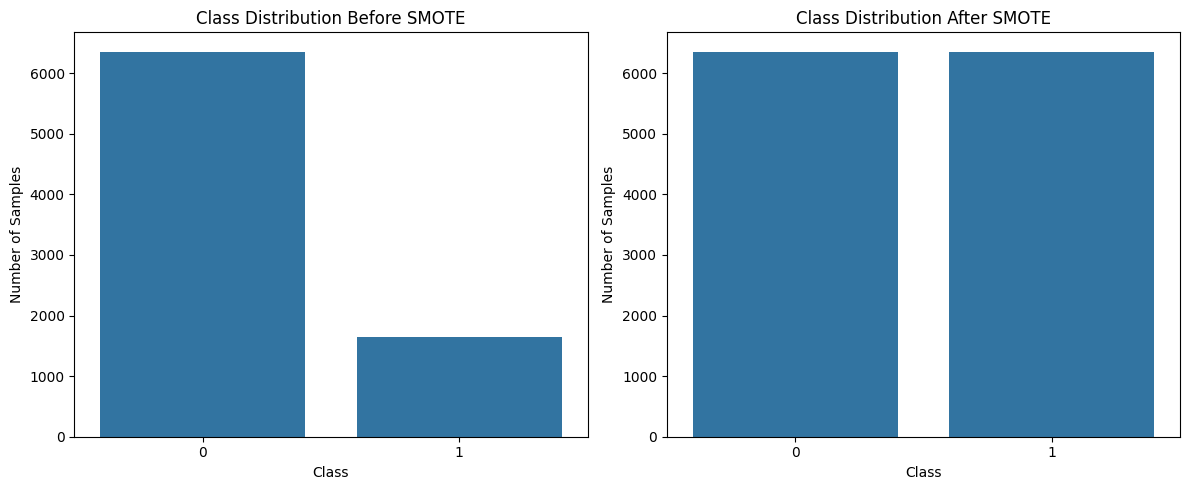

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Before SMOTE
counter_before = Counter(y_train)
# After SMOTE
counter_after = Counter(y_train_resampled)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot before SMOTE
sns.barplot(x=list(counter_before.keys()), y=list(counter_before.values()), ax=axes[0])
axes[0].set_title('Class Distribution Before SMOTE')
axes[0].set_xlabel('Class')
axes[0].set_ylabel('Number of Samples')

# Plot after SMOTE
sns.barplot(x=list(counter_after.keys()), y=list(counter_after.values()), ax=axes[1])
axes[1].set_title('Class Distribution After SMOTE')
axes[1].set_xlabel('Class')
axes[1].set_ylabel('Number of Samples')

plt.tight_layout()
plt.show()


In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train on the balanced training set (after SMOTE)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set (which is still imbalanced, so real-world scenario)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[1434  173]
 [ 164  229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1607
           1       0.57      0.58      0.58       393

    accuracy                           0.83      2000
   macro avg       0.73      0.74      0.74      2000
weighted avg       0.83      0.83      0.83      2000

ROC AUC Score: 0.8370867910905058


In [121]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Predict probabilities for test set with your model (use best_rf or others)
y_scores = best_rf.predict_proba(X_test)[:, 1]

# Calculate precision, recall, thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# For example, find threshold for recall >= 0.7
target_recall = 0.7
idx = np.where(recall >= target_recall)[0][-1]
optimal_threshold = thresholds[idx]

print(f"Threshold for recall >= {target_recall}: {optimal_threshold}")

# Predict classes using new threshold
y_pred_new = (y_scores >= optimal_threshold).astype(int)


Threshold for recall >= 0.7: 0.8


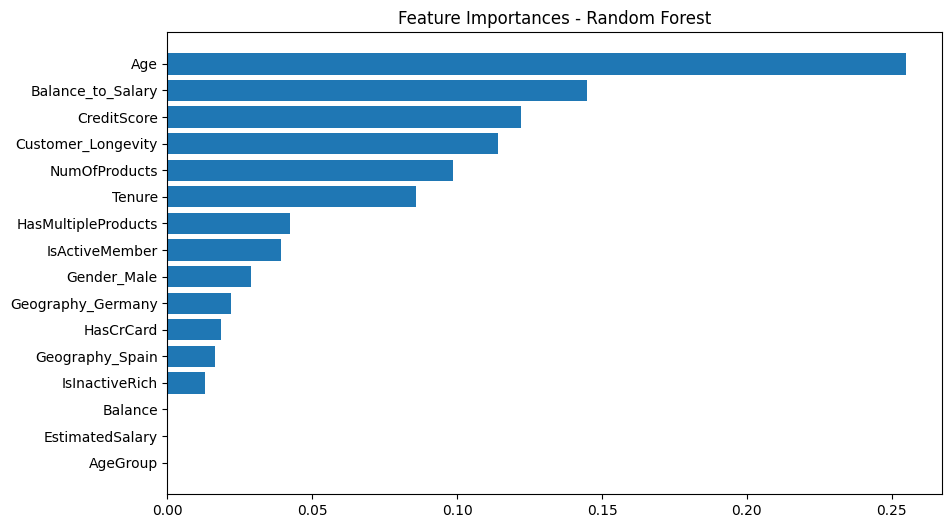

In [122]:
import matplotlib.pyplot as plt
import pandas as pd

# Feature importance from the trained Random Forest
importances = best_rf.feature_importances_

# Feature names
features = X_train_resampled.columns

# Create DataFrame for visualization
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'], feat_imp_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importances - Random Forest')
plt.show()


In [123]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE
import numpy as np

# Assume df is your dataframe and 'Exited' is target

X = df.drop('Exited', axis=1)
y = df['Exited']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

# Apply SMOTE on training data to balance classes
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train Random Forest on balanced data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_res, y_train_res)

# Predict probabilities on test set
y_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (churn)

# Try different thresholds and see precision, recall
thresholds = np.arange(0.1, 0.9, 0.1)
for thresh in thresholds:
    y_pred_thresh = (y_probs >= thresh).astype(int)
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    print(f"Threshold: {thresh:.2f} | Precision: {precision:.2f} | Recall: {recall:.2f} | F1-score: {f1:.2f}")


Threshold: 0.10 | Precision: 0.29 | Recall: 0.94 | F1-score: 0.45
Threshold: 0.20 | Precision: 0.36 | Recall: 0.85 | F1-score: 0.50
Threshold: 0.30 | Precision: 0.43 | Recall: 0.75 | F1-score: 0.55
Threshold: 0.40 | Precision: 0.50 | Recall: 0.69 | F1-score: 0.58
Threshold: 0.50 | Precision: 0.58 | Recall: 0.62 | F1-score: 0.60
Threshold: 0.60 | Precision: 0.66 | Recall: 0.53 | F1-score: 0.59
Threshold: 0.70 | Precision: 0.72 | Recall: 0.42 | F1-score: 0.53
Threshold: 0.80 | Precision: 0.82 | Recall: 0.31 | F1-score: 0.45


In [124]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train on the balanced training set (after SMOTE)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the original test set (which is still imbalanced, so real-world scenario)
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("ROC AUC Score:", roc_auc_score(y_test, y_proba))


Confusion Matrix:
[[1565   28]
 [  36  371]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1593
           1       0.93      0.91      0.92       407

    accuracy                           0.97      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.97      0.97      0.97      2000

ROC AUC Score: 0.9854268752573837


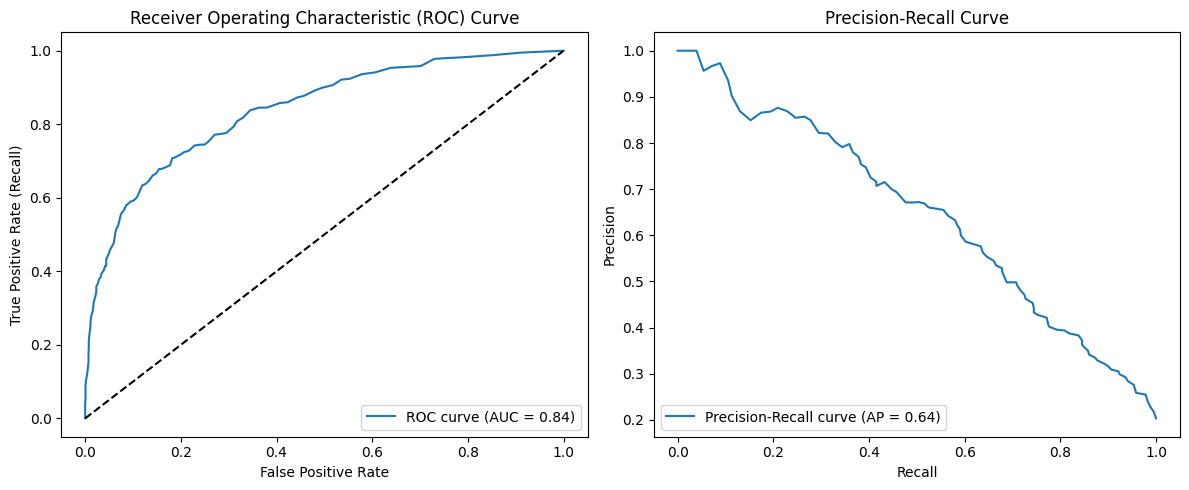

In [125]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

# Get predicted probabilities for the positive class (churn = 1)
y_scores = model.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(12, 5))

# Plot ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)
avg_precision = average_precision_score(y_test, y_scores)

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()
